In [1]:
from msatutil.msat_interface import *

Load data from multiple L2 files under the CH4_5x1 directory

In [2]:
l2 = get_msat('CH4_5x1')

In [3]:
l2.file_names

['MethaneAIR_L1B_CH4_20221025T161240_20221025T161311_20221028T124331_CO2proxy.nc',
 'MethaneAIR_L1B_CH4_20221025T164714_20221025T164744_20221028T124356_CO2proxy.nc',
 'MethaneAIR_L1B_CH4_20221025T165817_20221025T165847_20221028T124019_CO2proxy.nc',
 'MethaneAIR_L1B_CH4_20221025T171452_20221025T171522_20221028T124006_CO2proxy.nc',
 'MethaneAIR_L1B_CH4_20221025T171522_20221025T171552_20221028T124544_CO2proxy.nc',
 'MethaneAIR_L1B_CH4_20221025T173158_20221025T173228_20221028T124325_CO2proxy.nc',
 'MethaneAIR_L1B_CH4_20221025T173228_20221025T173258_20221028T124303_CO2proxy.nc',
 'MethaneAIR_L1B_CH4_20221025T175033_20221025T175103_20221028T124325_CO2proxy.nc',
 'MethaneAIR_L1B_CH4_20221025T180839_20221025T180909_20221029T170525_CO2proxy.nc',
 'MethaneAIR_L1B_CH4_20221025T180909_20221025T180939_20221028T124312_CO2proxy.nc',
 'MethaneAIR_L1B_CH4_20221025T182745_20221025T182815_20221028T124318_CO2proxy.nc',
 'MethaneAIR_L1B_CH4_20221025T182815_20221025T182845_20221028T124308_CO2proxy.nc',
 'Me

There are many granules in this **msat_collection** object, we can get a subset of granules over a powerplant 

In [4]:
pp = l2.subset(ids=[0])
pp.file_names

['MethaneAIR_L1B_CH4_20221025T161240_20221025T161311_20221028T124331_CO2proxy.nc']

Use the **search** method to quickly find variables

In [5]:
pp.search('ch4')

GROUP: Profile	VAR: CH4_GasMixingRatio ('lev', 'atrack', 'xtrack')
GROUP: Profile	VAR: CH4_ProxyMixingRatio ('atrack', 'xtrack')
GROUP: Posteriori_Profile	VAR: CH4_GasMixingRatio ('lev', 'atrack', 'xtrack')
GROUP: Posteriori_Profile	VAR: CH4_ProxyMixingRatio ('atrack', 'xtrack')
GROUP: SpecFitDiagnostics	VAR: CH4_ScaleFactor_DoFS ('atrack', 'xtrack')
GROUP: SpecFitDiagnostics	VAR: APosterioriState ('xmx', 'atrack', 'xtrack') 	SV_VAR: CH4_ScaleFactor 	SV_SLICE: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
GROUP: SpecFitDiagnostics	VAR: CH4_MixingRatioColumn_PosteriorCovar ('atrack', 'xtrack')
GROUP: SpecFitDiagnostics	VAR: CH4_ProxyRatio_PosteriorCovar ('atrack', 'xtrack')
GROUP: SpecFitDiagnostics	VAR: CH4_ColumnAveragingKernel ('lev', 'atrack', 'xtrack')


Methods like **pmesh_prep**, **grid_prep**, and **heatmap**, search for the matching variable in the same way and will use the first match returned by **search** if there are multiple instances like above
To get a variable from one of the other matches, we need to use the full variable name and specify the group

heatmap done in 0.07874846458435059 s


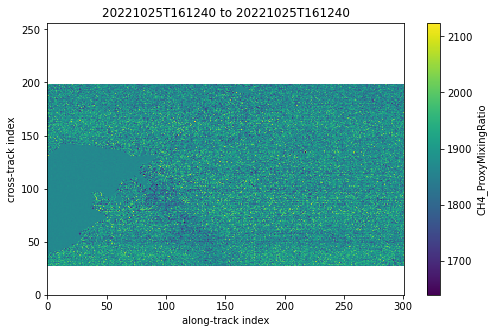

In [8]:
ion()
pp.heatmap('CH4_ProxyMixingRatio',grp='Posteriori_Profile',scale=1e9)

**heatmap** plots the variable vs cross- and along-track indices. It can also plot in lat-lon if given lat_lim and lon_lim arguments

Calling grid_prep on 1 files, divided in 1 chunks of 1 files

grid_prep now doing chunk   1/1heatmap done in 3.7846176624298096 s


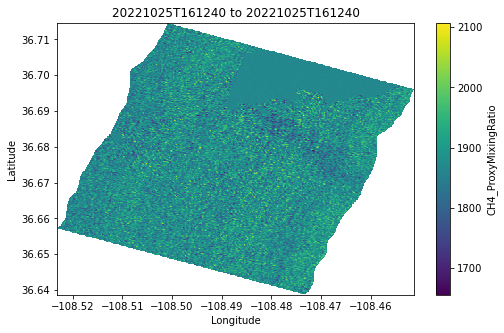

In [9]:
lon = pp.pmesh_prep('longitude').compute()
lat = pp.pmesh_prep('latitude').compute()
lon_lim = [np.nanmin(lon),np.nanmax(lon)]
lat_lim = [np.nanmin(lat),np.nanmax(lat)]
pp.heatmap('CH4_ProxyMixingRatio',grp='Posteriori_Profile',scale=1e9,lon_lim=lon_lim,lat_lim=lat_lim)

Note that grip_prep automatically deals with overlapping granules, it regrids the data on a same grid and averages multiple overpasses

All the groups and variables (indented under their group) with their dimensions can be shown with the **show_all** method

In [10]:
pp.show_all()

Level1
	 SolarZenithAngle ('atrack', 'xtrack')
	 ViewingZenithAngle ('atrack', 'xtrack')
	 RelativeAzimuthAngle ('atrack', 'xtrack')
	 ViewingAzimuthAngle ('atrack', 'xtrack')
	 SolarAzimuthAngle ('atrack', 'xtrack')
	 Longitude ('atrack', 'xtrack')
	 Latitude ('atrack', 'xtrack')
	 Time ('atrack', 'xtrack')
	 ObservationAltitude ('atrack', 'xtrack')
	 SurfaceAltitude ('atrack', 'xtrack')
	 CornerLongitudes ('nv', 'atrack', 'xtrack')
	 CornerLatitudes ('nv', 'atrack', 'xtrack')
Profile
	 PressureEdge ('lev_edge', 'atrack', 'xtrack')
	 AirPartialColumn ('lev', 'atrack', 'xtrack')
	 CO2_GasMixingRatio ('lev', 'atrack', 'xtrack')
	 CH4_GasMixingRatio ('lev', 'atrack', 'xtrack')
	 H2O_GasMixingRatio ('lev', 'atrack', 'xtrack')
	 CO2_ProxyMixingRatio ('atrack', 'xtrack')
	 CH4_ProxyMixingRatio ('atrack', 'xtrack')
	 H2O_ProxyMixingRatio ('atrack', 'xtrack')
RTM_Band1
OptProp_Band1
Posteriori_Profile
	 PressureEdge ('lev_edge', 'atrack', 'xtrack')
	 AirPartialColumn ('lev', 'atrack', 'xtrack

For 3D variable, an option can be given (e.g. sum, max, mean) together with the axis on which to apply the option, for example we can plot the max Radiance in the granule

In [11]:
l1 = get_msat('../level1/level1b/CH4_5x1')

In [12]:
l1_pp = l1.subset(ids=[0])

In [13]:
l1_pp.file_names

['MethaneAIR_L1B_CH4_20221025T161240_20221025T161311_20221028T124331.nc']

In [14]:
l1_pp.search('rad')

GROUP: Band1	VAR: Radiance ('along_track', 'across_track', 'spectral_channel')
GROUP: Band1	VAR: RadianceUncertainty ('along_track', 'across_track', 'spectral_channel')
GROUP: Band1	VAR: RadianceFlag ('along_track', 'across_track', 'spectral_channel')


The variables are transposed after being read (because I think the plots look better with the along-track axis on the horizontal). So to plot the max radiance we have to apply the **nanmax** option to the **0** axis (and not 2)

Calling grid_prep on 1 files, divided in 1 chunks of 1 files

grid_prep now doing chunk   1/1

/n/home11/sroche/anaconda3/envs/py310/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/n/home11/sroche/anaconda3/envs/py310/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/n/home11/sroche/anaconda3/envs/py310/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/n/home11/sroche/anaconda3/envs/py310/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/n/home11/sroche/anaconda3/envs/py310/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/n/home11/sroche/anaconda3/envs/py310/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache)

heatmap done in 13.669488906860352 s


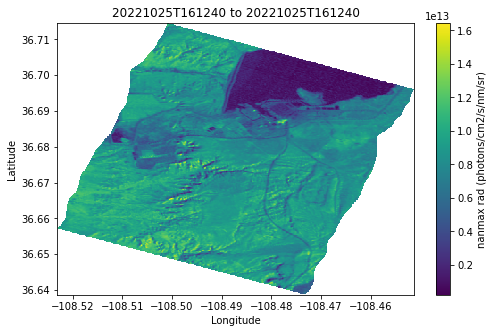

In [15]:
l1_pp.heatmap('rad',option='nanmax',option_axis=0,lon_lim=lon_lim,lat_lim=lat_lim)

/n/home11/sroche/anaconda3/envs/py310/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/n/home11/sroche/anaconda3/envs/py310/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


heatmap done in 2.970912218093872 s


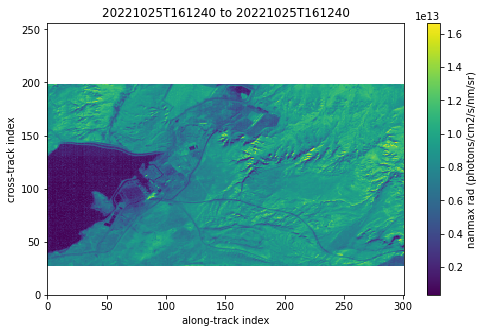

In [16]:
l1_pp.heatmap('rad',option='nanmax',option_axis=0)